# Basic numpy / scipy manipulations

This notebook will guide you with some basic numerical manipulations in Python, with the Numpy and Scipy packages.

**It assumes you have read and followed the instructions of `ex00.md` file (in the same directory)** in order to setup the virtual environment.

The kernel you see on top should be the one you have installed with the 

*Please send an email to brechet (at) mpi (dot) mis (dot) de if something is not working as planned.*

If this is the first Jupyter notebook you see: you
run the cells with the commands on the top or with `Ctrl-Enter`.

Import the modules

In [1]:
import numpy as np
import scipy as sp
from skimage import data # for images
import matplotlib.pyplot as plt

# Arrays in numpy

In [2]:
a = np.array([1, 2, 3])
print('shape of a:', a.shape)

shape of a: (3,)


Usual commands for creating arrays

In [3]:
b = np.arange(1, 10) # [begin, end)
c = np.ones((3, 2))  # 1s, shape given
d = np.zeros_like(c)  # also works with ones_like, empty_like
e = np.empty((2, 5))  # has to be initialized
print('e:', e)

e: [[-2.e+000 -2.e+000  4.e-323  0.e+000  0.e+000]
 [ 0.e+000  0.e+000  0.e+000  0.e+000  0.e+000]]


In [4]:
# Numpy has broadcasting abilities, meaning automatic copying arrays when one
# dimension is 1
print('shape of a:', a.shape)
print('shape of b:', b.shape)

shape of a: (3,)
shape of b: (9,)


In [5]:
c = a.reshape(-1, 1) * b.reshape(1, -1)  # see a as a column and b as a row

In [6]:
print('c:', c)

c: [[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]]


Basic function vectorization

In [7]:
t = np.linspace(0, 1, num=100)
f = 440
tt = 2*np.pi*f*t  # vector like t

In [8]:
v = np.sin(tt)  # sinus applied to tt

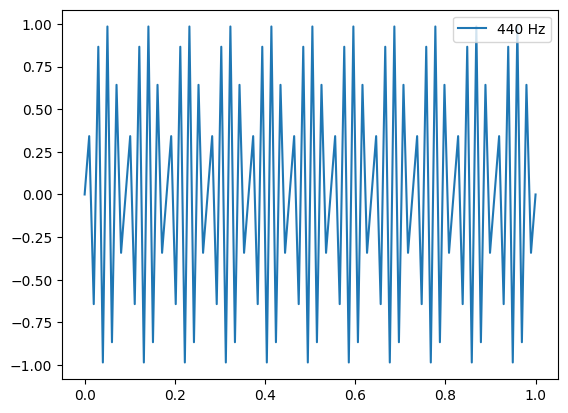

In [9]:
plt.figure()
# Ploting
plt.plot(t, v, label=f"{f} Hz")
plt.legend()
plt.show()

In [10]:
# Gaussian in 2d
x = np.linspace(-2, 2, num=100).reshape(1, -1)  # will be broadcasted along dim 0
y = np.linspace(-2, 2, num=100).reshape(-1, 1)  # will be broadcasted along dim 1

In [11]:
sigma_x =1
sigma_y = 0.5

In [12]:
Z = np.exp(-1/2 * ((x/sigma_x)**2 + (y/sigma_y)**2))

In [13]:
X, Y = np.meshgrid(x, y)  # makes 2D matrices out of 1D vectors

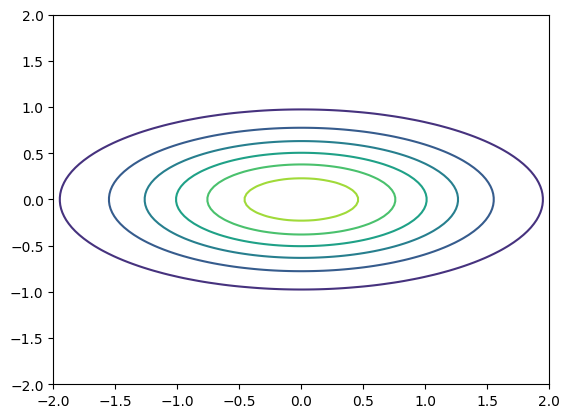

In [14]:
plt.figure()
plt.contour(X, Y, Z)
plt.show()

Perform as little loops as possible! 

Ex. sum of all the integers between 1 and 100

In [15]:
print(np.arange(1, 101).sum())

5050


# Simple image manipulation

load an image with scikit

In [16]:
camera = data.camera()  

In [17]:
print('shape of camera:', camera.shape)

shape of camera: (512, 512)


In [18]:
U, S, Vt = sp.linalg.svd(camera)  # performs a SVD

In [19]:
p = 10  # number of components
C2 = U[:, :p] @ (S[:p].reshape(-1, 1) * Vt[:p, :])

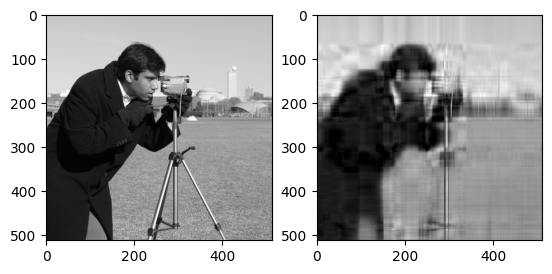

In [20]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(camera, cmap='gray', vmin=0, vmax=255)
axes[1].imshow(C2, cmap='gray', vmin=0, vmax=255)

In [ ]:
print("Reconstruction rate: {:.1f}%".format(100*S[:p].sum() / S.sum()))
plt.show()